In [29]:
#===================== Install required libraries ======================

# pip install scikit-learn numpy matplotlib pandas dtreeviz
#! pip install scikit-learn numpy matplotlib pandas

#===================== Import required libraries ======================

# importing required libraries
import pandas as pd
import numpy as np
!pip install dtreeviz 
!pip install scikit-learn

import matplotlib.pyplot as plt
%matplotlib inline



In [30]:
from sklearn.svm import SVC
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from dtreeviz.trees import dtreeviz
from sklearn.tree import plot_tree
#plot_tree(clf) 
#import numpy as np

In [31]:

#========================== Hyperparameters ===========================

# Set Hyperparameters
criterion = 'gini'
max_depth = 3
splitter = 'best'


In [32]:

#============================== Data set ===============================

# Loading iris dataset
data_set = datasets.load_iris()
X = data_set.data
y = data_set.target

# Splitting the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.2,
                                    stratify=y, 
                                    random_state=42)


In [33]:

#============================== Training ===============================

# Train Decision Tree Model
model = DecisionTreeClassifier(criterion=criterion, 
                max_depth=max_depth, splitter=splitter)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:

#============================== Testing ===============================

# Testing model on train data

# get the prediction labels of the training data
cross_validation = cross_val_score(model, X_train, y_train, cv=5)

# evaluate and print the results
print("\nModel Performance on Training Data: {}".format(
    np.mean(cross_validation).round(2)))

# Testing model on test data

# get the prediction labels of the test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print("\nModel Performance on Test Data: {}".format(
    accuracy.round(2)))

# Compute the Precision
precision = precision_score(y_test, y_pred, average="weighted").round(2)
print("\nPrecision: {}".format(precision))

# Compute the Recall
recall = recall_score(y_test, y_pred, average="weighted").round(2)
print("\nRecall: {}".format(recall))




Model Performance on Training Data: 0.93

Model Performance on Test Data: 0.97

Precision: 0.97

Recall: 0.97


In [35]:

import matplotlib.pyplot as pyplot

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


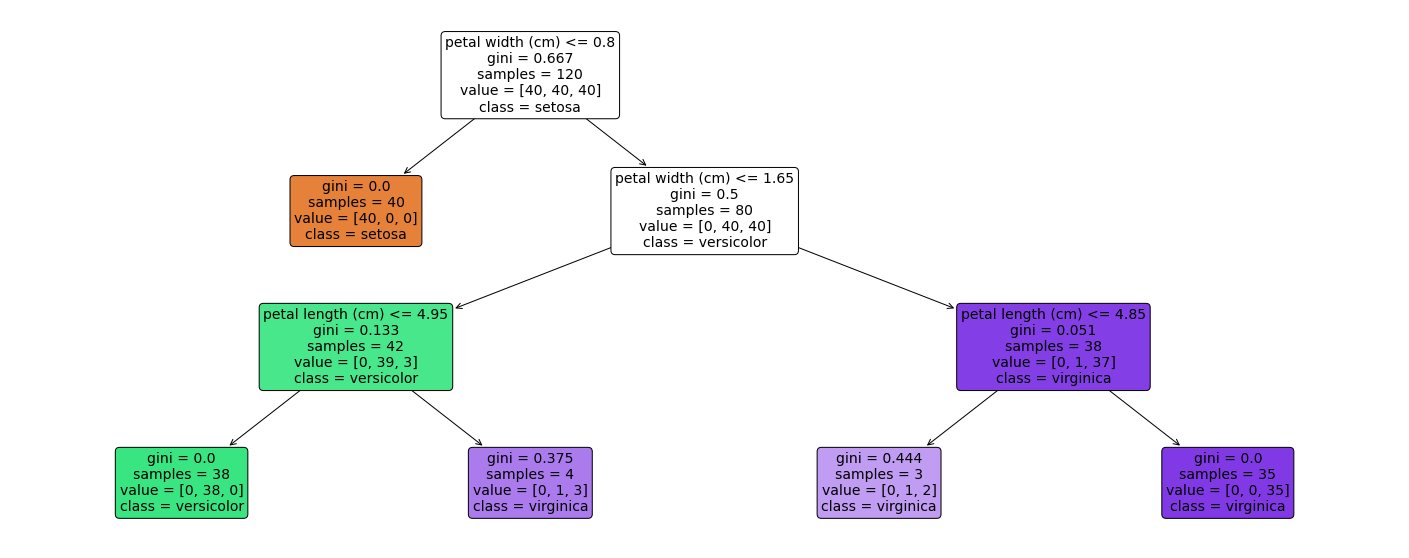

In [36]:
# Generate text reprot showing the main classification metrics
report = classification_report(y_test, y_pred)
print(report)

viz = dtreeviz(model, X, y,
                target_name="target",
                feature_names=data_set.feature_names,
                class_names=list(data_set.target_names))

viz

plt.figure(figsize=(25,10))
a = plot_tree(model,
              feature_names=data_set.feature_names,
              class_names=list(data_set.target_names),
              filled=True,
              rounded=True,
              fontsize=14)